#Q1. 	Investigate the use of Logistic Regression on a subset of the Kaggle Credit Card Fraud Data set (www.kaggle.com/dalpozz/creditcardfraud). Note that in this data set, the number of fraud data are much smaller than the normal data.

#Your first task would be to construct subset data set(s) from the Kaggle data set. Construct three subset data sets of 100K, 20K, and 10K, with normal and fraud data included (make sure you maximize the number of fraud data elements). Out of this data set construct a training data set and a testing data set (using 80% of the data for the former, and 20% for the latter) to build and test the logistic regression model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.utils import shuffle

df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [2]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,140703.000000,140703.000000,140703.000000,140703.000000,140703.000000,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000
mean,52017.063240,-0.249590,0.018631,0.672709,0.139629,-0.282394,0.079221,-0.117074,0.065108,-0.092798,-0.019711,0.210835,0.026681,-0.017456,0.030024,0.226097,-0.007317,0.043815,-0.085053,-0.018442,0.042551,-0.039490,-0.118699,-0.033307,0.011971,0.130149,0.023568,0.000598,0.002314,91.113847,0.001876
std,20935.874366,1.815360,1.612924,1.267514,1.321903,1.306687,1.283716,1.166104,1.230387,1.088043,1.049987,1.048182,1.020288,0.998237,0.916731,0.925427,0.877954,0.883405,0.832589,0.808304,0.721050,0.721606,0.635249,0.591371,0.595799,0.437282,0.491940,0.388942,0.306960,247.063579,0.043276
min,0.000000,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,-18.271168,-4.049895,-17.769143,-5.791881,-19.214325,-4.152532,-13.563273,-25.162799,-9.498746,-7.213527,-21.024817,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-22.565679,-11.710896,0.000000,0.000000
25%,38001.000000,-1.020857,-0.563417,0.169911,-0.713458,-0.903456,-0.661857,-0.603665,-0.130976,-0.714885,-0.491976,-0.547047,-0.375521,-0.672049,-0.343552,-0.310538,-0.475458,-0.410107,-0.550085,-0.506351,-0.169408,-0.226122,-0.548084,-0.171745,-0.325037,-0.136357,-0.326105,-0.060363,-0.004166,6.000000,0.000000
50%,53833.000000,-0.270868,0.105003,0.750128,0.167426,-0.314577,-0.176481,-0.064121,0.080542,-0.155239,-0.098314,0.125509,0.165729,-0.019329,0.060606,0.336925,0.071620,-0.021930,-0.084598,-0.018713,-0.026507,-0.059815,-0.095822,-0.044999,0.068728,0.166478,-0.064879,0.011792,0.023610,23.900000,0.000000
75%,69573.000000,1.157957,0.777163,1.362846,0.992618,0.237702,0.465523,0.409937,0.375410,0.481411,0.422900,1.032423,0.651319,0.642332,0.454459,0.893565,0.532741,0.430167,0.386750,0.476920,0.164840,0.113589,0.300817,0.083280,0.408711,0.418682,0.286656,0.087069,0.077145,80.910000,0.000000
max,83879.000000,1.960497,18.902453,9.382558,16.715537,34.801666,22.529298,36.677268,20.007208,15.594995,23.745136,12.018913,7.848392,4.465413,10.526766,5.784514,6.098529,9.253526,5.041069,5.228342,39.420904,27.202839,10.503090,19.002942,4.022866,5.541598,3.517346,12.152401,33.847808,19656.530000,1.000000


<BarContainer object of 2 artists>

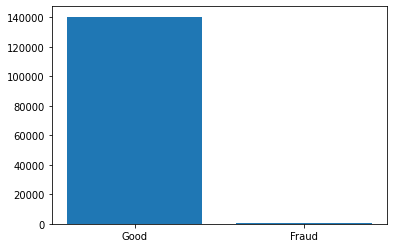

In [3]:
plt.bar(["Good","Fraud"],df['Class'].value_counts())

In [4]:
df.duplicated().sum()

529

In [5]:
df=df.drop_duplicates()
df_good=df[df['Class']==0]
df_fraud=df[df['Class']==1]

random_state_seed=42
fraud_len=len(df_fraud)
#This set contains 473 fraud cases and 100000 good cases
set_1=shuffle(pd.concat([df_fraud.sample(frac=1, random_state=random_state_seed), df_good.sample(frac=1, random_state=random_state_seed)[:100000]], axis=0))
#This set contains 473 fraud cases and 20000 good cases
set_2=shuffle(pd.concat([df_fraud.sample(frac=1, random_state=random_state_seed), df_good.sample(frac=1, random_state=random_state_seed)[:20000]]))
#This set contains 473 fraud cases and 10000 good cases
set_3=shuffle(pd.concat([df_fraud.sample(frac=1, random_state=random_state_seed), df_good.sample(frac=1, random_state=random_state_seed)[:10000]]))

In [6]:
set_1.shape,set_2.shape,set_3.shape

((100259, 31), (20259, 31), (10259, 31))

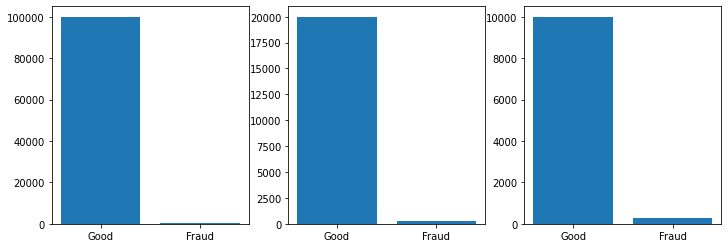

In [7]:
fig, axes = plt.subplots(1,3, figsize = (12,4))
axes[0].bar(["Good","Fraud"],set_1['Class'].value_counts())
axes[1].bar(["Good","Fraud"],set_2['Class'].value_counts())
axes[2].bar(["Good","Fraud"],set_3['Class'].value_counts())
plt.show()

In [8]:
for dataset in (set_1,set_2,set_3):
    minmax=MinMaxScaler((-1,1))
    for column in dataset.columns:
        if column!='Class':
            dataset[column]=minmax.fit_transform(dataset[[column]])

def create_df(set_):
    train_df=set_[0:round(0.8*len(set_))]
    test_df=set_[round(0.8*len(set_)):]
    X_train=train_df.drop(columns=['Class'])
    y_train=train_df['Class']
    X_test=test_df.drop(columns=['Class'])
    y_test=test_df['Class']
    return (X_train,y_train,X_test,y_test)

for dataset in (set_1,set_2,set_3):
    X_train,y_train,X_test,y_test=create_df(dataset)
    logreg = LogisticRegression(solver='liblinear',random_state=random_state_seed, penalty='l2', class_weight='balanced', max_iter=1000).fit(X_train, y_train)
    y_pred=logreg.predict(X_test)
    print("ROC SCORE",roc_auc_score(y_test,y_pred))
    print("ACCURACY ",accuracy_score(y_test,y_pred))

ROC SCORE 0.9319269330651113
ACCURACY  0.9812487532415719
ROC SCORE 0.9410044977511244
ACCURACY  0.9809970384995064
ROC SCORE 0.9374425274275049
ACCURACY  0.9814814814814815


In [9]:
df_fraud=df_fraud.append([df_fraud]*100,ignore_index=True )

set_4=shuffle(pd.concat([df_fraud.sample(frac=0.6, random_state=random_state_seed), df_good.sample(frac=0.25, random_state=random_state_seed)], axis=0))
set_5=shuffle(pd.concat([df_fraud.sample(frac=0.1, random_state=random_state_seed), df_good.sample(frac=0.06, random_state=random_state_seed)], axis=0))
set_6=shuffle(pd.concat([df_fraud.sample(frac=0.06, random_state=random_state_seed), df_good.sample(frac=0.024, random_state=random_state_seed)], axis=0))

In [10]:
set_4.shape,set_5.shape,set_6.shape

((50673, 31), (11011, 31), (4928, 31))

[]

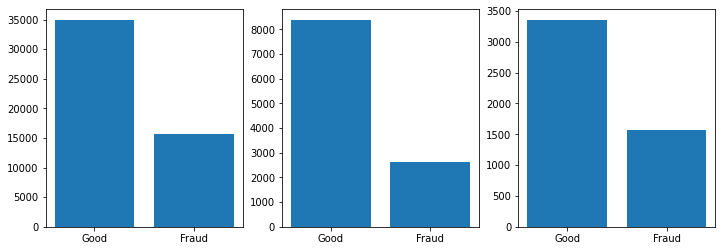

In [11]:
fig, axes = plt.subplots(1,3, figsize = (12,4))
axes[0].bar(["Good","Fraud"],set_4['Class'].value_counts())
axes[1].bar(["Good","Fraud"],set_5['Class'].value_counts())
axes[2].bar(["Good","Fraud"],set_6['Class'].value_counts())
plt.plot()

In [13]:
for dataset in (set_4,set_5,set_6):
    X_train,y_train,X_test,y_test=create_df(dataset)
    logreg = LogisticRegression(solver='liblinear',random_state=random_state_seed, penalty='l2', class_weight='balanced', max_iter=1000).fit(X_train, y_train)
    y_pred=logreg.predict(X_test)
    print("ROC SCORE",roc_auc_score(y_test,y_pred))
    print("ACCURACY ",accuracy_score(y_test,y_pred))

ROC SCORE 0.9424417041815237
ACCURACY  0.9530340404538727
ROC SCORE 0.9451612010209676
ACCURACY  0.9573115349682108
ROC SCORE 0.9524766176751288
ACCURACY  0.9563894523326572


#Q2. Implement the logistic regression model on the Smarket.csv dataset. Use all the attribute as variables.  And as output I need all the learned coefficients, and the scatter plot, and the classification graph generated  by  the logistic regression. 

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.utils import shuffle
import seaborn as sns

df=pd.read_csv("Smarket.csv")
df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [16]:
df.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


In [17]:
df.duplicated().sum()

0

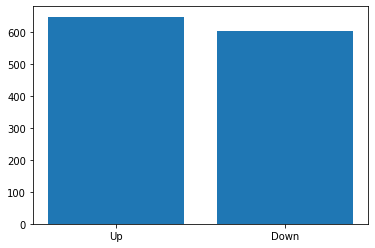

In [18]:
plt.bar(["Up","Down"],df['Direction'].value_counts())
plt.show()

In [19]:
X=df.drop(columns=['Year','Direction'])
y=df['Direction']

mm=MinMaxScaler()

X=mm.fit_transform(X)

lb=LabelBinarizer()
y=pd.DataFrame(lb.fit_transform(y))

In [20]:
y

,0
0,1
1,1
2,0
3,1
4,1
...,...
1245,1
1246,0
1247,1
1248,0


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf=LogisticRegression(random_state=42)
clf.fit(X_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
y_pred=clf.predict(X_test)

In [25]:
clf.coef_, clf.intercept_

(array([[-0.5817213 , -0.63443731,  0.37935018,  0.06776332,  0.30170363,
          0.1604908 , 12.42067721]]), array([-5.43234864]))

In [27]:
features=df.columns.to_list()
features.remove('Year')
features.remove('Direction')
logreg_coef=clf.coef_[0]

x_test=pd.DataFrame(X_test)

x_test[0].head()

0    0.401877
1    0.546410
2    0.769029
3    0.476771
4    0.672830
Name: 0, dtype: float64

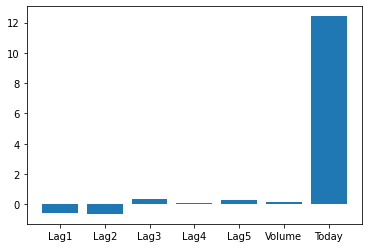

In [28]:
res=[]
for f, b in zip(features, logreg_coef):
    res.append((f,b))

plt.bar(features,logreg_coef)
plt.show()

In [29]:
print("Learnt Coefficients")
for i in res:
    print(i)

Learnt Coefficients
('Lag1', -0.5817213046376338)
('Lag2', -0.6344373061880886)
('Lag3', 0.37935018349055016)
('Lag4', 0.0677633182030959)
('Lag5', 0.3017036344733025)
('Volume', 0.16049080278747863)
('Today', 12.420677211399001)


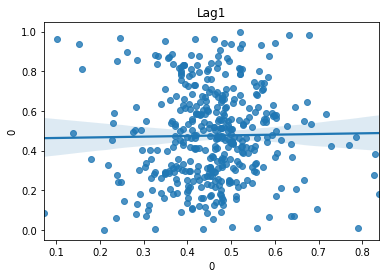

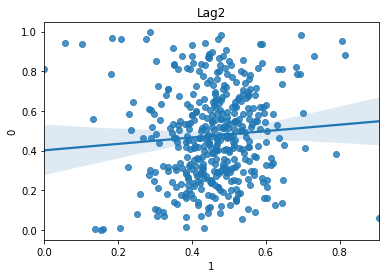

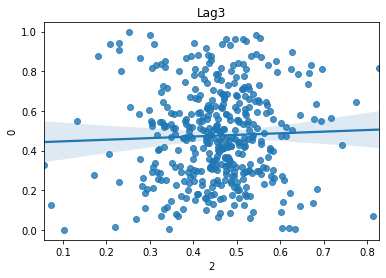

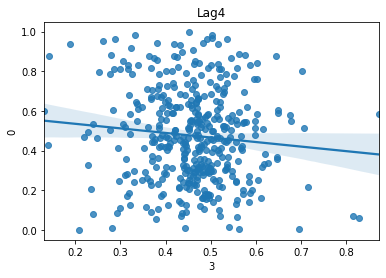

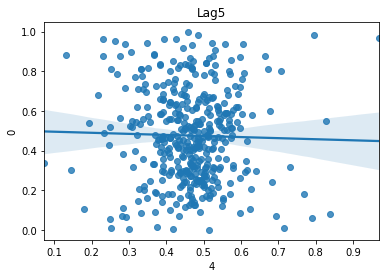

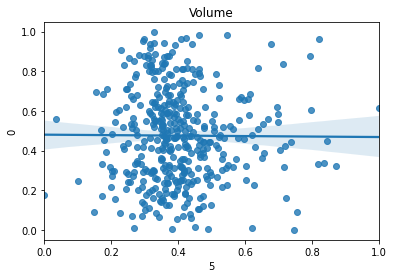

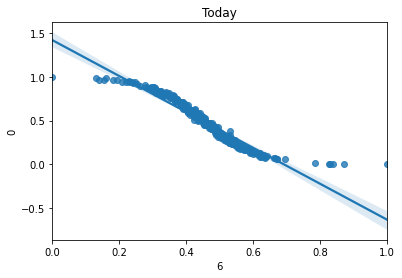

In [30]:
for i in range(0,7):
    sns.regplot(x=pd.DataFrame(X_test)[i],y=pd.DataFrame(clf.predict_proba(X_test)[:,0]))
    plt.title(features[i])
    plt.show()